In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('./data/dataset_creation/dataframes/v2/df_train.csv')

In [3]:
train_df

,new_class_id,xcn,ycn,wn,hn,img,img_w,img_h,class_name,bbox_area,bbox_size_category
0,1,0.713264,0.549830,0.059249,0.040532,33132,1624.0,1200.0,Car,4680.03960,Medium
1,1,0.217753,0.536722,0.069178,0.054257,33132,1624.0,1200.0,Car,7314.64800,Medium
2,1,0.138355,0.531935,0.067605,0.038299,33132,1624.0,1200.0,Car,5045.90230,Medium
3,4,0.503125,0.455294,0.865625,0.534118,111934,640.0,425.0,Aircraft,125758.08600,Large
4,0,0.119531,0.569792,0.020313,0.039583,102647,640.0,480.0,Person,246.99977,Tiny
...,...,...,...,...,...,...,...,...,...,...,...
740604,1,0.281250,0.518482,0.046875,0.025292,81579,640.0,514.0,Car,389.99957,Small
740605,1,0.169531,0.514591,0.023438,0.021401,81579,640.0,514.0,Car,165.00017,Tiny
740606,1,0.075781,0.509728,0.032813,0.027237,81579,640.0,514.0,Car,294.00050,Small
740607,1,0.025781,0.509728,0.051562,0.027237,81579,640.0,514.0,Car,462.00080,Small


# 1) Extract average object size

In [4]:
train_df['w'] = train_df['wn']*train_df['img_w']
train_df['h'] = train_df['hn']*train_df['img_h']
#train_df['ar'] = train_df['w']/(train_df['h']+1e-7)
train_df

,new_class_id,xcn,ycn,wn,hn,img,img_w,img_h,class_name,bbox_area,bbox_size_category,w,h
0,1,0.713264,0.549830,0.059249,0.040532,33132,1624.0,1200.0,Car,4680.03960,Medium,96.220376,48.638760
1,1,0.217753,0.536722,0.069178,0.054257,33132,1624.0,1200.0,Car,7314.64800,Medium,112.345072,65.108760
2,1,0.138355,0.531935,0.067605,0.038299,33132,1624.0,1200.0,Car,5045.90230,Medium,109.791007,45.959160
3,4,0.503125,0.455294,0.865625,0.534118,111934,640.0,425.0,Aircraft,125758.08600,Large,554.000000,227.000150
4,0,0.119531,0.569792,0.020313,0.039583,102647,640.0,480.0,Person,246.99977,Tiny,13.000000,18.999984
...,...,...,...,...,...,...,...,...,...,...,...,...,...
740604,1,0.281250,0.518482,0.046875,0.025292,81579,640.0,514.0,Car,389.99957,Small,30.000000,12.999985
740605,1,0.169531,0.514591,0.023438,0.021401,81579,640.0,514.0,Car,165.00017,Tiny,15.000000,11.000011
740606,1,0.075781,0.509728,0.032813,0.027237,81579,640.0,514.0,Car,294.00050,Small,21.000000,14.000024
740607,1,0.025781,0.509728,0.051562,0.027237,81579,640.0,514.0,Car,462.00080,Small,33.000000,14.000024


In [5]:
sizes = pd.concat([train_df['w'],train_df['h']], ignore_index=True)
sizes

0           96.220376
1          112.345072
2          109.791007
3          554.000000
4           13.000000
              ...    
1481213     12.999985
1481214     11.000011
1481215     14.000024
1481216     14.000024
1481217    332.595600
Length: 1481218, dtype: float64

In [6]:
print(sizes.mean())
print(sizes.median())
print(sizes.mode()[0])

98.49613486116972
54.0
15.0


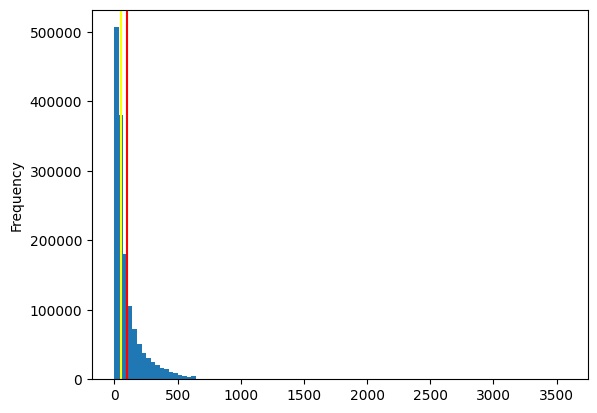

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sizes.plot.hist(bins=100, ax=ax)
ax.axvline(sizes.mean(), color='red')
ax.axvline(sizes.median(), color='yellow')

# 2) Get class inverse freq

In [9]:
import numpy as np

In [10]:
class_counts = train_df['class_name'].value_counts().values
train_df['class_name'].value_counts()

class_name
Person      449258
Car         206659
Truck        62430
Ship         11287
Aircraft      5679
UAV           5296
Name: count, dtype: int64

In [58]:
class_performance = np.array([51, 83, 70, 35, 70, 82])

In [61]:
classes_df = pd.DataFrame(train_df['class_name'].value_counts())
classes_df['performance'] = class_performance

<Axes: xlabel='class_name'>

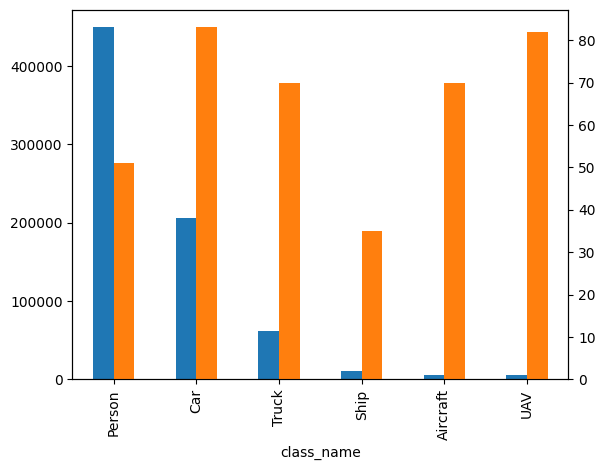

In [68]:
classes_df.plot.bar(secondary_y=['performance'], legend=False)

### 2.1) N/n_i

In [13]:
num_clases = len(class_counts)
num_samples = sum(class_counts)

c_weights = []
p_weights = []
for i in range(num_clases):
    c_weights.append(num_samples/class_counts[i])
    p_weights.append(class_performance.sum()/class_performance[i])

In [14]:
c_weights

[1.6485159974891932,
 3.5837248801165202,
 11.863030594265577,
 65.61610702578187,
 130.4118682866702,
 139.84308912386706]

In [15]:
p_weights

[7.666666666666667,
 4.710843373493976,
 5.585714285714285,
 11.17142857142857,
 5.585714285714285,
 4.7682926829268295]

### 2.2) N/(n_i*6)

In [17]:
num_clases = len(class_counts)
num_samples = sum(class_counts)

c_weights = []
p_weights = []
for i in range(num_clases):
    c_weights.append(num_samples/(class_counts[i]*num_clases))
    p_weights.append(class_performance.sum()/(class_performance[i]*num_clases))

In [18]:
c_weights

[0.2747526662481989,
 0.5972874800194201,
 1.9771717657109296,
 10.936017837630311,
 21.7353113811117,
 23.307181520644512]

In [19]:
p_weights

[1.2777777777777777,
 0.785140562248996,
 0.930952380952381,
 1.861904761904762,
 0.930952380952381,
 0.7947154471544715]

### 2.3) (1-b)/(1-b^n_i)

In [29]:
num_clases = len(class_counts)
num_samples = sum(class_counts)

c_weights = []
p_weights = []
for i in range(num_clases):
    c_weights.append((1-0.9)/(1-0.9**class_counts[i]))
    p_weights.append((1-0.9)/(1-0.9**class_performance[i]))

In [30]:
c_weights

[0.09999999999999998,
 0.09999999999999998,
 0.09999999999999998,
 0.09999999999999998,
 0.09999999999999998,
 0.09999999999999998]

In [31]:
p_weights

[0.1004660012678616,
 0.1000159293281193,
 0.10006269715952949,
 0.10256742207192297,
 0.10006269715952949,
 0.10001769956673502]

### 2.4) max(n)/n_i

In [44]:
num_clases = len(class_counts)
num_samples = sum(class_counts)

c_weights = []
p_weights = []
for i in range(num_clases):
    c_weights.append(max(class_counts)/(class_counts[i]))
    p_weights.append(class_performance.max()/(class_performance[i]))

In [45]:
c_weights

[1.0,
 2.17390967729448,
 7.196187730257889,
 39.80313635155488,
 79.10864588836063,
 84.82968277945619]

In [46]:
p_weights

[1.6274509803921569,
 1.0,
 1.1857142857142857,
 2.3714285714285714,
 1.1857142857142857,
 1.0121951219512195]

### 2.5) (N-ni)/n_i

In [47]:
num_clases = len(class_counts)
num_samples = sum(class_counts)

c_weights = []
p_weights = []
for i in range(num_clases):
    c_weights.append((num_samples-class_counts[i])/(class_counts[i]))
    p_weights.append((class_performance.sum()-class_performance[i])/(class_performance[i]))

In [48]:
c_weights

[0.6485159974891933,
 2.5837248801165202,
 10.863030594265577,
 64.61610702578187,
 129.4118682866702,
 138.84308912386706]

In [49]:
p_weights

[6.666666666666667,
 3.710843373493976,
 4.585714285714285,
 10.17142857142857,
 4.585714285714285,
 3.768292682926829]

### 2.6) log(2.1)

In [69]:
num_clases = len(class_counts)
num_samples = sum(class_counts)

c_weights = []
p_weights = []
for i in range(num_clases):
    c_weights.append(np.log(num_samples/class_counts[i]))
    p_weights.append(np.log(class_performance.sum()/class_performance[i]))

In [70]:
c_weights

[0.49987548775262214,
 1.2764027288058806,
 2.4734268916409596,
 4.183821199741123,
 4.870697659819317,
 4.9405210020799055]

In [71]:
p_weights

[2.03688192726104,
 1.5498669521887678,
 1.7202123179360067,
 2.413359498495952,
 1.7202123179360067,
 1.5619883127211127]

### 2.7) log(2.2)

In [72]:
num_clases = len(class_counts)
num_samples = sum(class_counts)

c_weights = []
p_weights = []
for i in range(num_clases):
    c_weights.append(np.log(num_samples/(class_counts[i]*num_clases)))
    p_weights.append(np.log(class_performance.sum()/(class_performance[i]*num_clases)))

In [73]:
c_weights

[-1.2918839814754328,
 -0.5153567404221743,
 0.6816674224129046,
 2.392061730513068,
 3.078938190591262,
 3.14876153285185]

In [74]:
p_weights

[0.2451224580329849,
 -0.24189251703928716,
 -0.0715471512920482,
 0.6216000292678971,
 -0.0715471512920482,
 -0.22977115650694238]

### 2.8) log(2.4)

In [75]:
num_clases = len(class_counts)
num_samples = sum(class_counts)

c_weights = []
p_weights = []
for i in range(num_clases):
    c_weights.append(np.log(max(class_counts)/(class_counts[i])))
    p_weights.append(np.log(class_performance.max()/(class_performance[i])))

In [76]:
c_weights

[0.0,
 0.7765272410532584,
 1.9735514038883373,
 3.6839457119885006,
 4.370822172066695,
 4.440645514327283]

In [77]:
p_weights

[0.48701497507227215,
 0.0,
 0.17034536574723894,
 0.8634925463071842,
 0.17034536574723894,
 0.01212136053234482]

### 2.9) log(2.5)

In [79]:
num_clases = len(class_counts)
num_samples = sum(class_counts)

c_weights = []
p_weights = []
for i in range(num_clases):
    c_weights.append(np.log((num_samples-class_counts[i])/(class_counts[i])))
    p_weights.append(np.log((class_performance.sum()-class_performance[i])/(class_performance[i])))

In [80]:
c_weights

[-0.43306860708087375,
 0.9492321097088224,
 2.3853653358211706,
 4.168463714474235,
 4.863000095686868,
 4.933344440269743]

In [81]:
p_weights

[1.8971199848858813,
 1.3112591751769764,
 1.5229458810806569,
 2.319582669362617,
 1.5229458810806569,
 1.3266220296334923]

### P as multiplicative factor

In [84]:
class_performance.sum()/class_performance

array([ 7.66666667,  4.71084337,  5.58571429, 11.17142857,  5.58571429,
        4.76829268])

In [86]:
class_performance/class_performance.sum()

array([0.13043478, 0.21227621, 0.17902813, 0.08951407, 0.17902813,
       0.20971867])

In [87]:
class_performance/class_performance.max()

array([0.61445783, 1.        , 0.84337349, 0.42168675, 0.84337349,
       0.98795181])